# (26) Fixed XV  -- New results

**Motivation**: No double dipping. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-MTMST/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-MTMST/figs')
tmp_dir = os.path.join(git_dir, 'jb-MTMST/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_MTMST'))
from vae.train_vae import TrainerVAE, ConfigTrainVAE
from vae.vae2d import VAE, ConfigVAE
from figures.fighelper import *
from analysis.glm import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
def _add_perf(df):
    x = df['r_tst_norm'].values.copy()
    x[x < 0] = np.nan

    perf = df['r'].values.copy()
    perf[np.isfinite(x)] = x[np.isfinite(x)]

    df.insert(8, 'perf', perf)
    return df

## Plot results ($\beta = 0.8$, older fit)

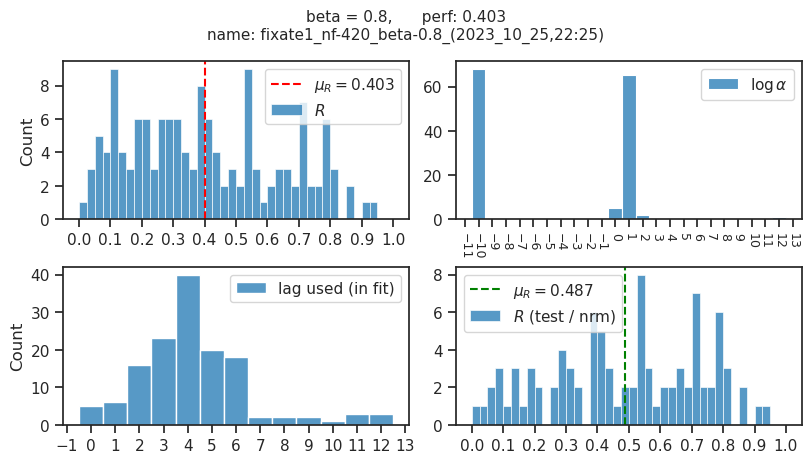

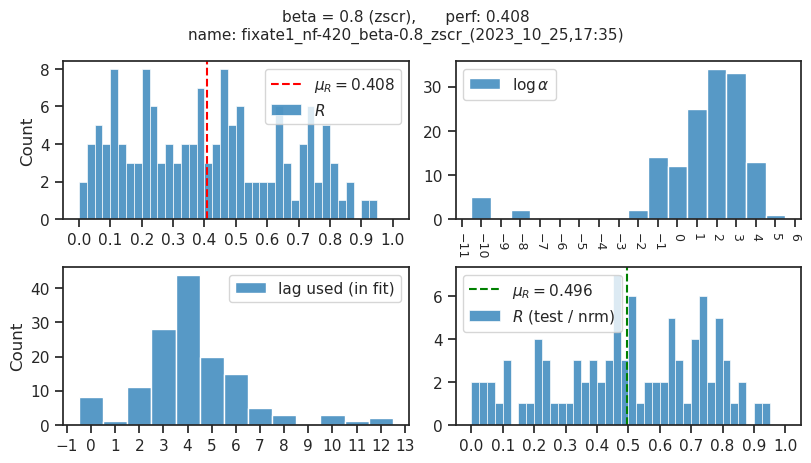

In [3]:
fits = {
    'beta = 0.8': 'fixate1_nf-420_beta-0.8_(2023_10_25,22:25)',
    'beta = 0.8 (zscr)': 'fixate1_nf-420_beta-0.8_zscr_(2023_10_25,17:35)',
}
for k, fit_name in fits.items():
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    df = _add_perf(df)

    title = f"{k},      perf: {df['perf'].mean():0.3f}\nname: {fit_name}"
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(title, y=1.12, fontsize=11)
    display(fig)

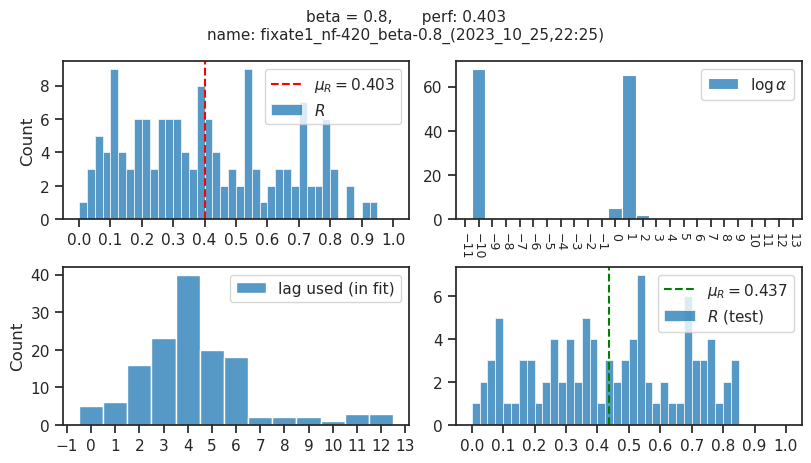

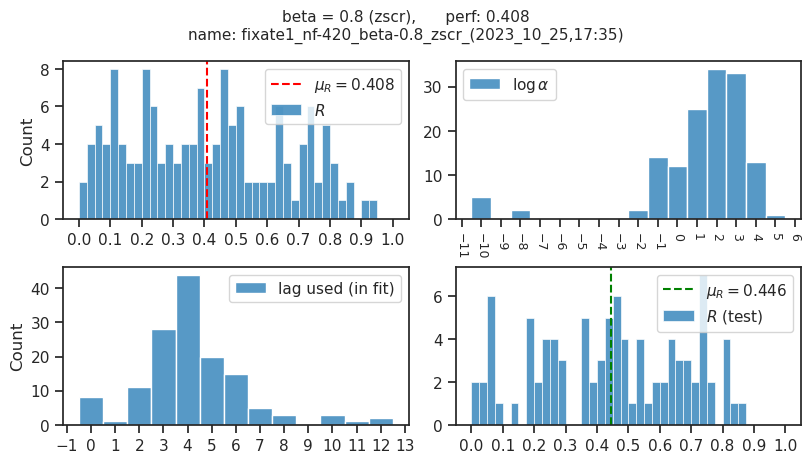

## Save for the others

In [59]:
fits = [
    # beta = 0.5
    'fixate1_nf-420_beta-0.5_(2023_08_08,15:39)/fit_main',
    'vanilla_fixate1_nf-420_beta-0.5_(2023_05_07,02:51)/fit_main',
    # beta = 1
    'fixate1_nf-420_beta-1.0_(2023_04_29,19:41)/fit_main',
    'vanilla_fixate1_nf-420_beta-1.0_(2023_05_07,01:18)/fit_main',
    # beta = 5
    'fixate1_nf-420_beta-5.0_(2023_05_07,08:59)/fit_main',
    'vanilla_fixate1_nf-420_beta-5.0_(2023_05_15,07:23)/fit_main',
    # beta = ae
    'fixate1_nf-420_beta-ae_(2023_05_12,07:31)/fit_main',
    'vanilla_fixate1_nf-420_beta-ae_(2023_05_13,07:49)/fit_main',
    # beta = 0.8
    'fixate1_nf-420_beta-0.8_(2023_05_13,14:52)/fit_main',
    'vanilla_fixate1_nf-420_beta-0.8_(2023_05_11,02:19)/fit_main',
]
save_script_neural(fits, 'cuda:1')

[PROGRESS] 'run_neuron_kaba.txt' saved at
/home/hadi/Dropbox/git/_MTMST/scripts

In [66]:
fits = [
    # beta = ae
    'fixate1_nf-420_beta-ae_(2023_05_12,07:31)/fit_main',
    'vanilla_fixate1_nf-420_beta-ae_(2023_05_13,07:49)/fit_main',
]
save_script_neural(fits, 'cuda:1')

[PROGRESS] 'run_neuron_kaba.txt' saved at
/home/hadi/Dropbox/git/_MTMST/scripts

In [60]:
log_a = [[-6], range(-2, 9, 2), [16]]
log_a = itertools.chain(*log_a)
sorted(log_a)

[-6, -2, 0, 2, 4, 6, 8, 16]

## Plot results (all)

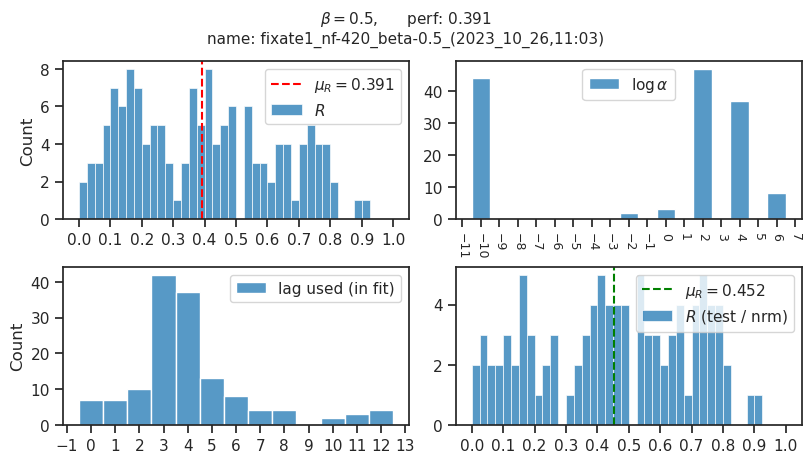

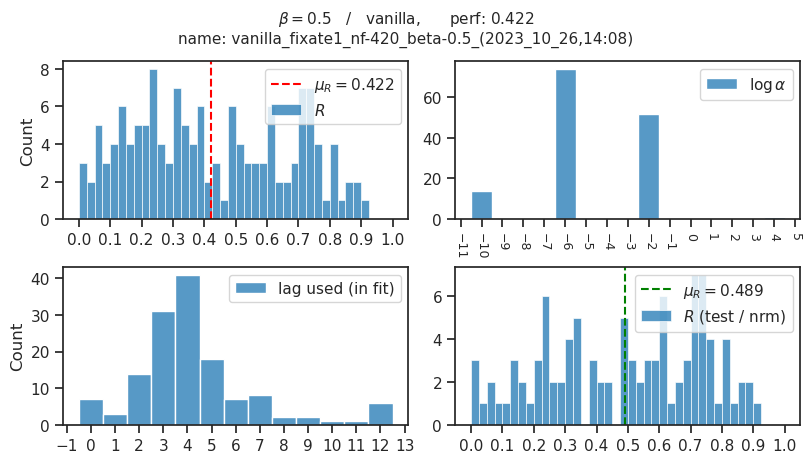

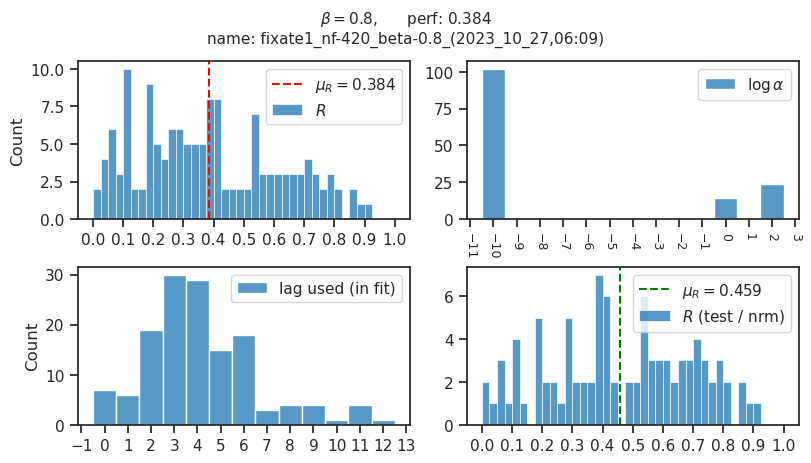

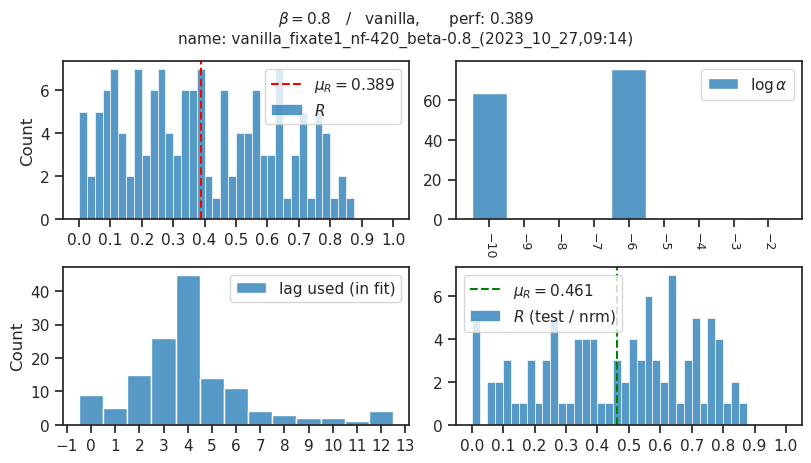

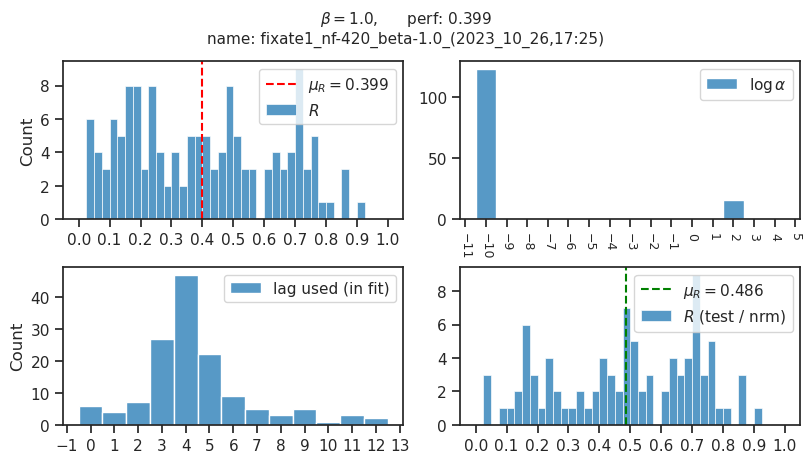

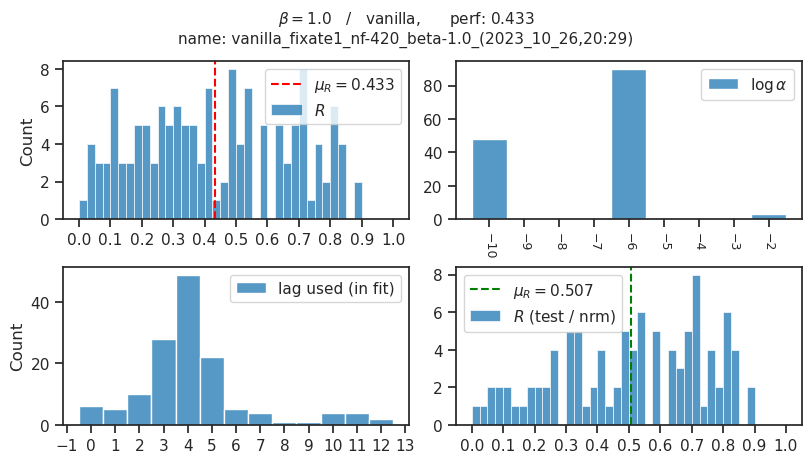

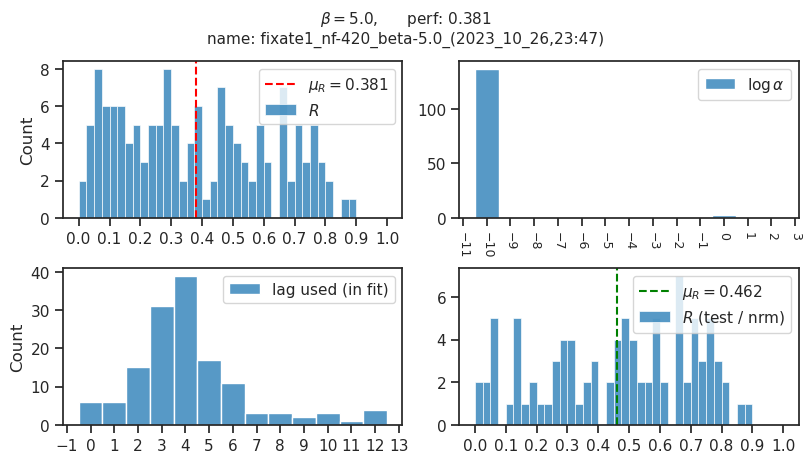

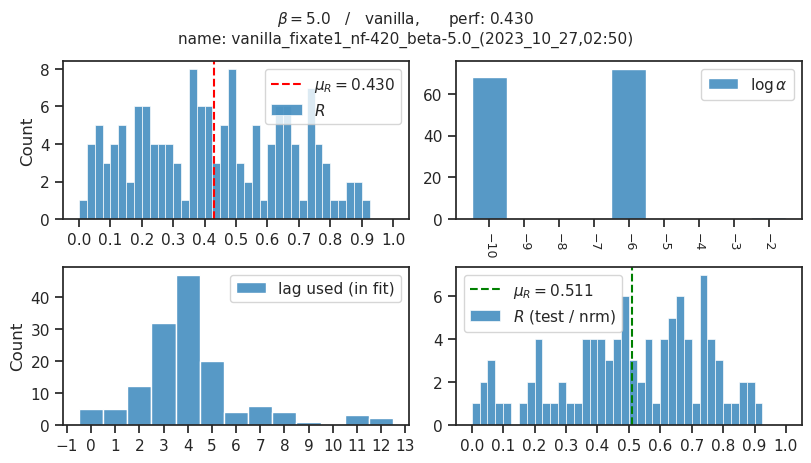

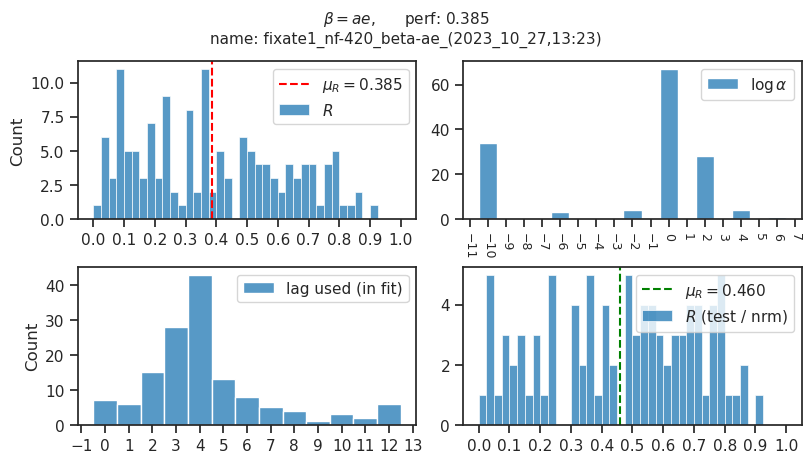

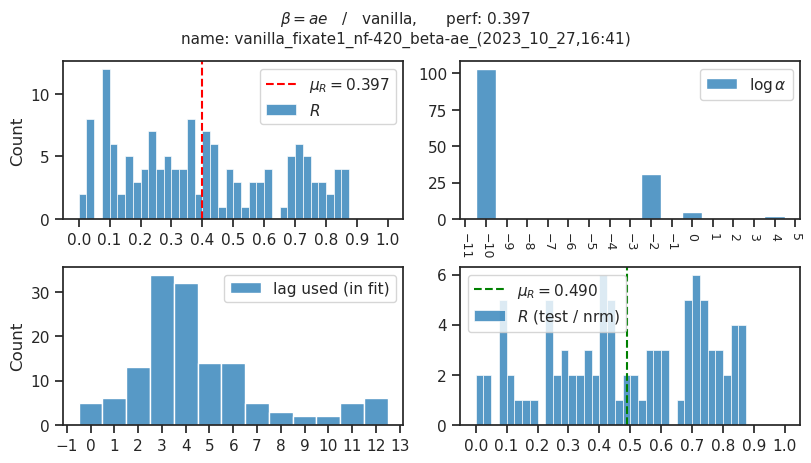

In [3]:
fits = {
    r'$\beta = 0.5$': 'fixate1_nf-420_beta-0.5_(2023_10_26,11:03)',
    r'$\beta = 0.5$' + '   /   vanilla': 'vanilla_fixate1_nf-420_beta-0.5_(2023_10_26,14:08)',
    r'$\beta = 0.8$': 'fixate1_nf-420_beta-0.8_(2023_10_27,06:09)',
    r'$\beta = 0.8$' + '   /   vanilla': 'vanilla_fixate1_nf-420_beta-0.8_(2023_10_27,09:14)',
    r'$\beta = 1.0$': 'fixate1_nf-420_beta-1.0_(2023_10_26,17:25)',
    r'$\beta = 1.0$' + '   /   vanilla': 'vanilla_fixate1_nf-420_beta-1.0_(2023_10_26,20:29)',
    r'$\beta = 5.0$': 'fixate1_nf-420_beta-5.0_(2023_10_26,23:47)',
    r'$\beta = 5.0$' + '   /   vanilla': 'vanilla_fixate1_nf-420_beta-5.0_(2023_10_27,02:50)',
    r'$\beta = ae$': 'fixate1_nf-420_beta-ae_(2023_10_27,13:23)',
    r'$\beta = ae$' + '   /   vanilla': 'vanilla_fixate1_nf-420_beta-ae_(2023_10_27,16:41)',
}
for k, fit_name in fits.items():
    df, df_all, ro_all, args, tr = summarize_neural_fits(fit_name)
    df = _add_perf(df)

    title = f"{k},      perf: {df['perf'].mean():0.3f}\nname: {fit_name}"
    fig, _ = show_neural_results(df, display=False)
    fig.suptitle(title, y=1.12, fontsize=11)
    display(fig)

In [7]:
def _add_perf(df, fill_nan=True):
    x = df['r_tst_norm'].values.copy()
    if fill_nan:
        x[x < 0] = np.nan

    perf = df['r'].values.copy()
    perf[np.isfinite(x)] = x[np.isfinite(x)]

    df.insert(8, 'perf', perf)
    return df

In [13]:
for k, fit_name in fits.items():
    df = pd.read_pickle(pjoin(
        results_dir(),
        fit_name,
        f"summary_{fit_name}.df",
    ))
    if 'vanilla' in fit_name:
        df = _add_perf(df, fill_nan=False)
    else:
        df = _add_perf(df, fill_nan=True)

    *_, beta, model = extract_info(fit_name)

    mu = df['perf'].mean()
    se = sp_stats.sem(df['perf'].values)

    print(model, beta, mu, se)

cNVAE 0.5 0.39131143565026183 0.019735983367182856

VAE 0.5 0.4146595230027863 0.02202557729306022

cNVAE 0.8 0.38386004813153823 0.0197376607543283

VAE 0.8 0.36805166861462524 0.022896630364273828

cNVAE 1.0 0.3987329546356648 0.019963794202430094

VAE 1.0 0.41811145372872377 0.022639505082893117

cNVAE 5.0 0.38126025521849083 0.02023355652858202

VAE 5.0 0.41448292268200704 0.022309388872782374

cNAE ae 0.38511825305322567 0.020306721568319284

AE ae 0.43181427062097383 0.04014095504147723

In [102]:
results = {
    (0.5, 'cNVAE'): (0.391 + 0.020),
    (0.5, 'VAE'): (0.415 + 0.022),
    (0.8, 'cNVAE'): (0.433 + 0.020),
    (0.8, 'VAE'): (0.383 + 0.023),
    (1.0, 'cNVAE'): (0.399 + 0.020),
    (1.0, 'VAE'): (0.386 + 0.021),
    (5.0, 'cNVAE'): (0.381 + 0.020),
    (5.0, 'VAE'): (0.414 + 0.022),
}

In [4]:
for k, fit_name in fits.items():
    df = pd.read_pickle(pjoin(
        results_dir(),
        fit_name,
        f"summary_{fit_name}.df",
    ))
    if 'vanilla' in fit_name:
        x = df['r_tst_norm'].values
        x = x[np.isfinite(x)]
    else:
        x = df['r_tst_norm'].values
        x = x[x > 0]

    *_, beta, model = extract_info(fit_name)
    gap = ' ' * 8 if model == 'VAE' else ' ' * 6

    mu = np.mean(x)
    se = sp_stats.sem(x)

    msg = f"beta = {beta} / {model}{gap}"
    msg += f"mu ± se =  {mu:0.3f} ±  {se:0.3f}"
    print(msg)

beta = 0.5 / cNVAE      mu ± se =  0.452 ±  0.025

beta = 0.5 / VAE        mu ± se =  0.461 ±  0.027

beta = 0.8 / cNVAE      mu ± se =  0.459 ±  0.025

beta = 0.8 / VAE        mu ± se =  0.401 ±  0.029

beta = 1.0 / cNVAE      mu ± se =  0.486 ±  0.024

beta = 1.0 / VAE        mu ± se =  0.466 ±  0.028

beta = 5.0 / cNVAE      mu ± se =  0.462 ±  0.025

beta = 5.0 / VAE        mu ± se =  0.461 ±  0.027

beta = ae / cNAE      mu ± se =  0.460 ±  0.026

beta = ae / AE      mu ± se =  0.412 ±  0.031

In [5]:
def float_to_str(f):
    s = f"{f:0.3f}"
    if "." in s and s.startswith("0"):
        return s[1:]
    return s

In [6]:
table = collections.defaultdict(dict)
for k, fit_name in fits.items():
    df = pd.read_pickle(pjoin(
        results_dir(),
        fit_name,
        f"summary_{fit_name}.df",
    ))
    if 'vanilla' in fit_name:
        x = df['r_tst_norm'].values
        x = x[np.isfinite(x)]
    else:
        x = df['r_tst_norm'].values
        x = x[x > 0]

    *_, beta, model = extract_info(fit_name)
    gap = ' ' * 5 if model == 'VAE' else ' ' * 3

    mu = np.mean(x)
    se = sp_stats.sem(x)
    
    table[model][beta] = ' \pm '.join([
        f"${float_to_str(mu)}",
        f"{float_to_str(se)}$",
    ])

In [7]:
for model, v in table.items():
    s = ''
    if 'ae' in v:
        s = v['ae']
    else:
        for b in [0.5, 0.8, 1.0, 5.0]:
            extra = '\n' if b == 5.0 else '&\n'
            s += f"{v[b]} {extra}" 
    print(model)
    print(s)

cNVAE

$.452 \pm .025$ &
$.459 \pm .025$ &
$.486 \pm .024$ &
$.462 \pm .025$

VAE

$.461 \pm .027$ &
$.401 \pm .029$ &
$.466 \pm .028$ &
$.461 \pm .027$

cNAE

$.460 \pm .026$

AE

$.412 \pm .031$

In [80]:
print(s)

$0.542 \pm 0.066$

In [35]:
for k, fit_name in fits.items():
    df = pd.read_pickle(pjoin(
        results_dir(),
        fit_name,
        f"summary_{fit_name}.df",
    ))
    if 'vanilla' in fit_name:
        x = df['r_tst_norm'].values
        x = x[np.isfinite(x)]
    else:
        x = df['r_tst_norm'].values
        x = x[x > 0]

    *_, beta, model = extract_info(fit_name)

    mu = np.mean(x)
    se = sp_stats.sem(x)
    
    gap = ' ' * 5 if model == 'VAE' else ' ' * 3

    msg = f"beta = {beta} / {model}{gap}"
    msg += f"({mu - se:0.3f} , {mu + se:0.3f} )"
    print(msg)

beta = 0.5 / cNVAE   (0.427 , 0.477 )

beta = 0.5 / VAE     (0.434 , 0.488 )

beta = 0.8 / cNVAE   (0.434 , 0.484 )

beta = 0.8 / VAE     (0.372 , 0.430 )

beta = 1.0 / cNVAE   (0.462 , 0.510 )

beta = 1.0 / VAE     (0.438 , 0.493 )

beta = 5.0 / cNVAE   (0.437 , 0.488 )

beta = 5.0 / VAE     (0.433 , 0.488 )

beta = ae / cNAE   (0.435 , 0.486 )

beta = ae / AE   (0.476 , 0.607 )

In [37]:
lower = 0.462

for k, fit_name in fits.items():
    df = pd.read_pickle(pjoin(
        results_dir(),
        fit_name,
        f"summary_{fit_name}.df",
    ))
    if 'vanilla' in fit_name:
        x = df['r_tst_norm'].values
        x = x[np.isfinite(x)]
    else:
        x = df['r_tst_norm'].values
        x = x[x > 0]

    *_, beta, model = extract_info(fit_name)

    mu = np.mean(x)
    se = sp_stats.sem(x)
    
    if mu + se >= lower:
        print(f"{beta} / {model}: bold")
    else:
        print(f"{beta} / {model}: --")

0.5 / cNVAE: bold

0.5 / VAE: bold

0.8 / cNVAE: bold

0.8 / VAE: --

1.0 / cNVAE: bold

1.0 / VAE: bold

5.0 / cNVAE: bold

5.0 / VAE: bold

ae / cNAE: bold

ae / AE: bold

In [47]:
for k, fit_name in fits.items():
    df = pd.read_pickle(pjoin(
        results_dir(),
        fit_name,
        f"summary_{fit_name}.df",
    ))
    break

In [52]:
np.isfinite(df['r_tst']).sum(), np.isnan(df['r_tst']).sum(), len(df['r_tst'])

(105, 36, 141)